<a href="https://colab.research.google.com/github/dreamtx01/Springboard/blob/master/Capstone_ML_Rev7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. IMPORT LIBRARIES**

In [ ]:
# This cell is to import the libraries

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.model_selection
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV, KFold, cross_validate, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest,RFECV
from sklearn.feature_selection import chi2
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold,RFE,SelectFromModel,SelectKBest,f_classif, chi2, mutual_info_classif
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from scipy.stats import f_oneway,ttest_ind,ttest_1samp, stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
logreg=LogisticRegression()
warnings.filterwarnings("ignore")
print("Beginning")

Beginning


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


**2. LOADING THE RAW DATA **
**Regular Season Data**

In [ ]:
# This is to load the regular season detailed results and the Team spellings
capstone = pd.read_csv("RegularSeasonDetailedResults.csv")

In [ ]:
capstone.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9.0,2.0,20.0
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8.0,6.0,16.0
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2.0,5.0,23.0
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4.0,3.0,23.0
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7.0,1.0,14.0


**3. Data Preprocessing**

**a. Dropping the neutral location so as to use home and away as target variable**



In [ ]:
capstone['WLoc'].value_counts()

H    49960
A    25501
N     8678
Name: WLoc, dtype: int64

In [ ]:
Neutral =capstone.loc[capstone.WLoc== "N",:]
Neutral=capstone[capstone['WLoc']=='N'].index
newcapstone=capstone.drop(Neutral)

#newcapstone["Lloc"]=newcapstone["WLoc"]
newcapstone

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
5,2003,11,1458,81,1186,55,H,0,26,57,6,12,23,27,12,24,12,9,9,3,18,20,46,3,11,12,17,6,22,8,19,4.0,3.0,25.0
6,2003,12,1161,80,1236,62,H,0,23,55,2,8,32,39,13,18,14,17,11,1,25,19,41,4,15,20,28,9,21,11,30,10.0,4.0,28.0
9,2003,12,1458,84,1296,56,H,0,32,67,5,17,15,19,14,22,11,6,12,0,13,23,52,3,14,7,12,9,23,10,18,1.0,3.0,18.0
10,2003,13,1166,106,1426,50,H,0,41,69,15,25,9,13,15,29,21,11,10,6,16,17,52,4,11,12,17,8,15,8,17,7.0,3.0,15.0
13,2003,13,1323,76,1125,48,H,0,25,56,10,23,16,23,8,35,18,13,14,19,13,18,64,8,24,4,8,14,26,12,17,10.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84134,2019,56,1337,100,1105,64,H,0,34,57,15,29,17,22,9,21,24,15,11,4,10,24,54,11,23,5,11,12,17,19,24,8.0,1.0,19.0
84135,2019,56,1435,90,1421,59,H,0,27,48,5,19,31,40,14,27,16,13,4,7,15,21,53,7,19,10,11,6,14,7,16,4.0,0.0,27.0
84136,2019,56,1438,100,1267,64,H,0,33,62,12,27,22,26,14,31,18,16,7,5,18,20,57,6,22,18,23,6,17,5,13,11.0,4.0,20.0
84137,2019,56,1451,93,1225,87,A,0,29,54,9,22,26,31,7,25,15,8,2,1,18,30,56,10,19,17,19,2,21,11,7,3.0,0.0,23.0


In [ ]:
capstonem=newcapstone.copy()

In [ ]:
capstonem.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
5,2003,11,1458,81,1186,55,H,0,26,57,6,12,23,27,12,24,12,9,9,3,18,20,46,3,11,12,17,6,22,8,19,4.0,3.0,25.0
6,2003,12,1161,80,1236,62,H,0,23,55,2,8,32,39,13,18,14,17,11,1,25,19,41,4,15,20,28,9,21,11,30,10.0,4.0,28.0
9,2003,12,1458,84,1296,56,H,0,32,67,5,17,15,19,14,22,11,6,12,0,13,23,52,3,14,7,12,9,23,10,18,1.0,3.0,18.0
10,2003,13,1166,106,1426,50,H,0,41,69,15,25,9,13,15,29,21,11,10,6,16,17,52,4,11,12,17,8,15,8,17,7.0,3.0,15.0
13,2003,13,1323,76,1125,48,H,0,25,56,10,23,16,23,8,35,18,13,14,19,13,18,64,8,24,4,8,14,26,12,17,10.0,0.0,17.0


In [ ]:
#capstonem["LLoc"]=capstonem["WLoc"]

capstonem['LLoc'] = ["A" if x == "H" else "H" for x in capstonem['WLoc']]


In [ ]:
capstonem.reset_index(inplace=True,drop=True)
capstonem.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,LLoc
0,2003,11,1458,81,1186,55,H,0,26,57,6,12,23,27,12,24,12,9,9,3,18,20,46,3,11,12,17,6,22,8,19,4.0,3.0,25.0,A
1,2003,12,1161,80,1236,62,H,0,23,55,2,8,32,39,13,18,14,17,11,1,25,19,41,4,15,20,28,9,21,11,30,10.0,4.0,28.0,A
2,2003,12,1458,84,1296,56,H,0,32,67,5,17,15,19,14,22,11,6,12,0,13,23,52,3,14,7,12,9,23,10,18,1.0,3.0,18.0,A
3,2003,13,1166,106,1426,50,H,0,41,69,15,25,9,13,15,29,21,11,10,6,16,17,52,4,11,12,17,8,15,8,17,7.0,3.0,15.0,A
4,2003,13,1323,76,1125,48,H,0,25,56,10,23,16,23,8,35,18,13,14,19,13,18,64,8,24,4,8,14,26,12,17,10.0,0.0,17.0,A


In [ ]:
wcols=['WFGM',	'WFGA',	'WFGM3',	'WFGA3',	'WFTM',	'WFTA',	'WOR',	'WDR',	'WAst',	'WTO',	'WStl',	'WBlk',	'WPF',"WLoc","WTeamID"]

In [ ]:
lcols=['LFGM',	'LFGA',	'LFGM3',	'LFGA3',	'LFTM',	'LFTA',	'LOR',	'LDR',	'LAst',	'LTO',	'LStl',	'LBlk',	'LPF',"LLoc","LTeamID"]

In [ ]:
acols=['AFGM',	'AFGA',	'AFGM3',	'AFGA3',	'AFTM',	'AFTA',	'AOR',	'ADR',	'AAst',	'ATO',	'AStl',	'ABlk',	'APF',"ALoc","ATeamID"]

In [ ]:
hcols=['HFGM',	'HFGA',	'HFGM3',	'HFGA3',	'HFTM',	'HFTA',	'HOR',	'HDR',	'HAst',	'HTO',	'HStl',	'HBlk',	'HPF',"HLoc","HTeamID"]

In [ ]:
for i in range(0,len(acols)):
  capstonem[acols[i]]=[capstonem.loc[j,wcols[i]] if capstonem.loc[j,"WLoc"]=="A" 
                       else capstonem.loc[j,lcols[i]] for j in range (0,len(capstonem))]                            

In [ ]:
for i in range(0,len(hcols)):
  capstonem[hcols[i]]=[capstonem.loc[j,wcols[i]] if capstonem.loc[j,"WLoc"]=="H" 
                       else capstonem.loc[j,lcols[i]] for j in range (0,len(capstonem))]

In [ ]:
for i in range(0,len(acols)):
  capstonem[acols[i]]=[capstonem.loc[j,wcols[i]] if capstonem.loc[j,"LLoc"]=="a" 
                       else capstonem.loc[j,lcols[i]] for j in range (0,len(capstonem))]

In [ ]:
for i in range(0,len(hcols)):
  capstonem[hcols[i]]=[capstonem.loc[j,wcols[i]] if capstonem.loc[j,"LLoc"]=="H" 
                       else capstonem.loc[j,lcols[i]] for j in range (0,len(capstonem))]

In [ ]:
capstonem

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,LLoc,AFGM,AFGA,AFGM3,AFGA3,AFTM,AFTA,AOR,ADR,AAst,ATO,AStl,ABlk,APF,ALoc,ATeamID,HFGM,HFGA,HFGM3,HFGA3,HFTM,HFTA,HOR,HDR,HAst,HTO,HStl,HBlk,HPF,HLoc,HTeamID
0,2003,11,1458,81,1186,55,H,0,26,57,6,12,23,27,12,24,12,9,9,3,18,20,46,3,11,12,17,6,22,8,19,4.0,3.0,25.0,A,20,46,3,11,12,17,6,22,8,19,4.0,3.0,25.0,A,1186,20,46,3,11,12,17,6,22,8,19,4.0,3.0,25.0,A,1186
1,2003,12,1161,80,1236,62,H,0,23,55,2,8,32,39,13,18,14,17,11,1,25,19,41,4,15,20,28,9,21,11,30,10.0,4.0,28.0,A,19,41,4,15,20,28,9,21,11,30,10.0,4.0,28.0,A,1236,19,41,4,15,20,28,9,21,11,30,10.0,4.0,28.0,A,1236
2,2003,12,1458,84,1296,56,H,0,32,67,5,17,15,19,14,22,11,6,12,0,13,23,52,3,14,7,12,9,23,10,18,1.0,3.0,18.0,A,23,52,3,14,7,12,9,23,10,18,1.0,3.0,18.0,A,1296,23,52,3,14,7,12,9,23,10,18,1.0,3.0,18.0,A,1296
3,2003,13,1166,106,1426,50,H,0,41,69,15,25,9,13,15,29,21,11,10,6,16,17,52,4,11,12,17,8,15,8,17,7.0,3.0,15.0,A,17,52,4,11,12,17,8,15,8,17,7.0,3.0,15.0,A,1426,17,52,4,11,12,17,8,15,8,17,7.0,3.0,15.0,A,1426
4,2003,13,1323,76,1125,48,H,0,25,56,10,23,16,23,8,35,18,13,14,19,13,18,64,8,24,4,8,14,26,12,17,10.0,0.0,17.0,A,18,64,8,24,4,8,14,26,12,17,10.0,0.0,17.0,A,1125,18,64,8,24,4,8,14,26,12,17,10.0,0.0,17.0,A,1125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75456,2019,56,1337,100,1105,64,H,0,34,57,15,29,17,22,9,21,24,15,11,4,10,24,54,11,23,5,11,12,17,19,24,8.0,1.0,19.0,A,24,54,11,23,5,11,12,17,19,24,8.0,1.0,19.0,A,1105,24,54,11,23,5,11,12,17,19,24,8.0,1.0,19.0,A,1105
75457,2019,56,1435,90,1421,59,H,0,27,48,5,19,31,40,14,27,16,13,4,7,15,21,53,7,19,10,11,6,14,7,16,4.0,0.0,27.0,A,21,53,7,19,10,11,6,14,7,16,4.0,0.0,27.0,A,1421,21,53,7,19,10,11,6,14,7,16,4.0,0.0,27.0,A,1421
75458,2019,56,1438,100,1267,64,H,0,33,62,12,27,22,26,14,31,18,16,7,5,18,20,57,6,22,18,23,6,17,5,13,11.0,4.0,20.0,A,20,57,6,22,18,23,6,17,5,13,11.0,4.0,20.0,A,1267,20,57,6,22,18,23,6,17,5,13,11.0,4.0,20.0,A,1267
75459,2019,56,1451,93,1225,87,A,0,29,54,9,22,26,31,7,25,15,8,2,1,18,30,56,10,19,17,19,2,21,11,7,3.0,0.0,23.0,H,30,56,10,19,17,19,2,21,11,7,3.0,0.0,23.0,H,1225,29,54,9,22,26,31,7,25,15,8,2.0,1.0,18.0,A,1451


In [ ]:
capstonem['AFGM3Rat'] = (round((capstonem['AFGM3']/(capstonem['AFGA3'])), 2))
capstonem['HFGM3Rat'] = (round((capstonem['HFGM3']/(capstonem['HFGA3'])), 2))

capstonem['AFGARat'] = (round((capstonem['AFGM']/(capstonem['AFGA'])), 2))
capstonem['HFGARat'] = (round((capstonem['HFGM']/(capstonem['HFGA'])), 2))

capstonem['AFTMRat'] = (round((capstonem['AFTM']/(capstonem['AFTA'])), 2))
capstonem['HFTMRat'] = (round((capstonem['HFTM']/(capstonem['HFTM'])), 2))

capstonem['AAstRat'] = (round((capstonem['AAst']/(capstonem['AFGM'])), 2))
capstonem['HAStRat'] = (round((capstonem['HAst']/(capstonem['HFGM'])), 2))
capstonem.replace(np.nan, 0, inplace=True)

In [ ]:
capstonem

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,LLoc,AFGM,AFGA,AFGM3,AFGA3,AFTM,AFTA,AOR,ADR,AAst,ATO,AStl,ABlk,APF,ALoc,ATeamID,HFGM,HFGA,HFGM3,HFGA3,HFTM,HFTA,HOR,HDR,HAst,HTO,HStl,HBlk,HPF,HLoc,HTeamID,AFGM3Rat,HFGM3Rat,AFGARat,HFGARat,AFTMRat,HFTMRat,AAstRat,HAStRat
0,2003,11,1458,81,1186,55,H,0,26,57,6,12,23,27,12,24,12,9,9,3,18,20,46,3,11,12,17,6,22,8,19,4.0,3.0,25.0,A,20,46,3,11,12,17,6,22,8,19,4.0,3.0,25.0,A,1186,20,46,3,11,12,17,6,22,8,19,4.0,3.0,25.0,A,1186,0.27,0.27,0.43,0.43,0.71,1.0,0.40,0.40
1,2003,12,1161,80,1236,62,H,0,23,55,2,8,32,39,13,18,14,17,11,1,25,19,41,4,15,20,28,9,21,11,30,10.0,4.0,28.0,A,19,41,4,15,20,28,9,21,11,30,10.0,4.0,28.0,A,1236,19,41,4,15,20,28,9,21,11,30,10.0,4.0,28.0,A,1236,0.27,0.27,0.46,0.46,0.71,1.0,0.58,0.58
2,2003,12,1458,84,1296,56,H,0,32,67,5,17,15,19,14,22,11,6,12,0,13,23,52,3,14,7,12,9,23,10,18,1.0,3.0,18.0,A,23,52,3,14,7,12,9,23,10,18,1.0,3.0,18.0,A,1296,23,52,3,14,7,12,9,23,10,18,1.0,3.0,18.0,A,1296,0.21,0.21,0.44,0.44,0.58,1.0,0.43,0.43
3,2003,13,1166,106,1426,50,H,0,41,69,15,25,9,13,15,29,21,11,10,6,16,17,52,4,11,12,17,8,15,8,17,7.0,3.0,15.0,A,17,52,4,11,12,17,8,15,8,17,7.0,3.0,15.0,A,1426,17,52,4,11,12,17,8,15,8,17,7.0,3.0,15.0,A,1426,0.36,0.36,0.33,0.33,0.71,1.0,0.47,0.47
4,2003,13,1323,76,1125,48,H,0,25,56,10,23,16,23,8,35,18,13,14,19,13,18,64,8,24,4,8,14,26,12,17,10.0,0.0,17.0,A,18,64,8,24,4,8,14,26,12,17,10.0,0.0,17.0,A,1125,18,64,8,24,4,8,14,26,12,17,10.0,0.0,17.0,A,1125,0.33,0.33,0.28,0.28,0.50,1.0,0.67,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75456,2019,56,1337,100,1105,64,H,0,34,57,15,29,17,22,9,21,24,15,11,4,10,24,54,11,23,5,11,12,17,19,24,8.0,1.0,19.0,A,24,54,11,23,5,11,12,17,19,24,8.0,1.0,19.0,A,1105,24,54,11,23,5,11,12,17,19,24,8.0,1.0,19.0,A,1105,0.48,0.48,0.44,0.44,0.45,1.0,0.79,0.79
75457,2019,56,1435,90,1421,59,H,0,27,48,5,19,31,40,14,27,16,13,4,7,15,21,53,7,19,10,11,6,14,7,16,4.0,0.0,27.0,A,21,53,7,19,10,11,6,14,7,16,4.0,0.0,27.0,A,1421,21,53,7,19,10,11,6,14,7,16,4.0,0.0,27.0,A,1421,0.37,0.37,0.40,0.40,0.91,1.0,0.33,0.33
75458,2019,56,1438,100,1267,64,H,0,33,62,12,27,22,26,14,31,18,16,7,5,18,20,57,6,22,18,23,6,17,5,13,11.0,4.0,20.0,A,20,57,6,22,18,23,6,17,5,13,11.0,4.0,20.0,A,1267,20,57,6,22,18,23,6,17,5,13,11.0,4.0,20.0,A,1267,0.27,0.27,0.35,0.35,0.78,1.0,0.25,0.25
75459,2019,56,1451,93,1225,87,A,0,29,54,9,22,26,31,7,25,15,8,2,1,18,30,56,10,19,17,19,2,21,11,7,3.0,0.0,23.0,H,30,56,10,19,17,19,2,21,11,7,3.0,0.0,23.0,H,1225,29,54,9,22,26,31,7,25,15,8,2.0,1.0,18.0,A,1451,0.53,0.41,0.54,0.54,0.89,1.0,0.37,0.52


In [ ]:
#Team_total=capstonem[["LLoc","WLoc","AFGM","AFGA","AFGM3","AFGA3","AFTM","AFTA","AOR","ADR","AAst","ATO","AStl","ABlk","APF","HFGM","HFGA","HFGM3","HFGA3","HFTM","HFTA","HOR","HDR","HAst","HTO","HStl","HBlk","HPF"]]

In [ ]:
#Team_total=capstonem[["LLoc","WLoc","AOR","HOR","AFGA","AFGA3","AFTA","ADR","AAst","ATO","AStl","ABlk","APF","HFGA","HFGA3","HFTA","HDR","HAst","HTO","HStl","HBlk","HPF"]]

#Team_total=capstonem[["LLoc","WLoc","AOR","HOR","ADR","AAst","ATO","AStl","ABlk","APF",'AFGM3Rat','HFGM3Rat',"AFGARat","HFGARat",'AFTMRat','HFTMRat',"HDR","HAst","HTO","HStl","HBlk","HPF"]]

Team_total=capstonem[["LLoc","WLoc","AOR","HOR","ADR","AAst","ATO","AStl","ABlk","APF",'AFGM3Rat','HFGM3Rat',"AFGARat","HFGARat",'AFTMRat','HFTMRat',"AAstRat","HAStRat","HDR","HAst","HTO","HStl","HBlk","HPF"]]

In [ ]:
Team_total

,LLoc,WLoc,AOR,HOR,ADR,AAst,ATO,AStl,ABlk,APF,AFGM3Rat,HFGM3Rat,AFGARat,HFGARat,AFTMRat,HFTMRat,AAstRat,HAStRat,HDR,HAst,HTO,HStl,HBlk,HPF
0,A,H,6,6,22,8,19,4.0,3.0,25.0,0.27,0.27,0.43,0.43,0.71,1.0,0.40,0.40,22,8,19,4.0,3.0,25.0
1,A,H,9,9,21,11,30,10.0,4.0,28.0,0.27,0.27,0.46,0.46,0.71,1.0,0.58,0.58,21,11,30,10.0,4.0,28.0
2,A,H,9,9,23,10,18,1.0,3.0,18.0,0.21,0.21,0.44,0.44,0.58,1.0,0.43,0.43,23,10,18,1.0,3.0,18.0
3,A,H,8,8,15,8,17,7.0,3.0,15.0,0.36,0.36,0.33,0.33,0.71,1.0,0.47,0.47,15,8,17,7.0,3.0,15.0
4,A,H,14,14,26,12,17,10.0,0.0,17.0,0.33,0.33,0.28,0.28,0.50,1.0,0.67,0.67,26,12,17,10.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75456,A,H,12,12,17,19,24,8.0,1.0,19.0,0.48,0.48,0.44,0.44,0.45,1.0,0.79,0.79,17,19,24,8.0,1.0,19.0
75457,A,H,6,6,14,7,16,4.0,0.0,27.0,0.37,0.37,0.40,0.40,0.91,1.0,0.33,0.33,14,7,16,4.0,0.0,27.0
75458,A,H,6,6,17,5,13,11.0,4.0,20.0,0.27,0.27,0.35,0.35,0.78,1.0,0.25,0.25,17,5,13,11.0,4.0,20.0
75459,H,A,2,7,21,11,7,3.0,0.0,23.0,0.53,0.41,0.54,0.54,0.89,1.0,0.37,0.52,25,15,8,2.0,1.0,18.0


**b. Picking the features for the Logistic Regression, but dropping WLOC,Season,NumOT, WTID,LTID. Create a new dataframe called newcapstone for target variable (y) and newcapstonewoloc (X) for independent variable**

In [ ]:
#Define y:  y= WLoc Set Home =1 and Way = 0

Team_total['WLoc'] = [1 if val == 'H' else 0 for val in Team_total['WLoc']]
y=Team_total.WLoc


**Investigating the y variable**


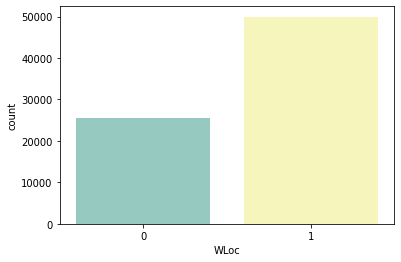

In [ ]:
sns.countplot (x="WLoc",data =Team_total,palette="Set3")

In [ ]:
away = Team_total['WLoc'].value_counts()[0] # first value of the result above
home = Team_total['WLoc'].value_counts()[1] # second value of the result above
total = home+ away # total count of flights
perc_away=away/ total # converting to float to get a float result
perc_home=home/ total
print("Percent of away: {}".format(perc_away))
print("Percent of home: {}".format(perc_home))
    

Percent of away: 0.33793615244960973
Percent of home: 0.6620638475503903


In [ ]:
#Set Home =1 and Away = 0
#Define X: Dataframe without WLOC
#X =Team_total.drop(["LLoc"], axis=1)
X =Team_total.drop(["LLoc","WLoc"], axis=1)

X

,AOR,HOR,ADR,AAst,ATO,AStl,ABlk,APF,AFGM3Rat,HFGM3Rat,AFGARat,HFGARat,AFTMRat,HFTMRat,AAstRat,HAStRat,HDR,HAst,HTO,HStl,HBlk,HPF
0,6,6,22,8,19,4.0,3.0,25.0,0.27,0.27,0.43,0.43,0.71,1.0,0.40,0.40,22,8,19,4.0,3.0,25.0
1,9,9,21,11,30,10.0,4.0,28.0,0.27,0.27,0.46,0.46,0.71,1.0,0.58,0.58,21,11,30,10.0,4.0,28.0
2,9,9,23,10,18,1.0,3.0,18.0,0.21,0.21,0.44,0.44,0.58,1.0,0.43,0.43,23,10,18,1.0,3.0,18.0
3,8,8,15,8,17,7.0,3.0,15.0,0.36,0.36,0.33,0.33,0.71,1.0,0.47,0.47,15,8,17,7.0,3.0,15.0
4,14,14,26,12,17,10.0,0.0,17.0,0.33,0.33,0.28,0.28,0.50,1.0,0.67,0.67,26,12,17,10.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75456,12,12,17,19,24,8.0,1.0,19.0,0.48,0.48,0.44,0.44,0.45,1.0,0.79,0.79,17,19,24,8.0,1.0,19.0
75457,6,6,14,7,16,4.0,0.0,27.0,0.37,0.37,0.40,0.40,0.91,1.0,0.33,0.33,14,7,16,4.0,0.0,27.0
75458,6,6,17,5,13,11.0,4.0,20.0,0.27,0.27,0.35,0.35,0.78,1.0,0.25,0.25,17,5,13,11.0,4.0,20.0
75459,2,7,21,11,7,3.0,0.0,23.0,0.53,0.41,0.54,0.54,0.89,1.0,0.37,0.52,25,15,8,2.0,1.0,18.0


In [ ]:
capstonem['AFTMRat'].unique()

array([0.71, 0.58, 0.5 , 0.63, 0.64, 0.78, 0.91, 0.45, 0.69, 0.89, 0.25,
       0.7 , 0.73, 0.67, 0.62, 0.36, 0.83, 0.56, 0.75, 0.85, 0.47, 0.65,
       0.6 , 0.94, 0.68, 0.74, 0.21, 0.76, 0.9 , 0.52, 0.4 , 1.  , 0.88,
       0.59, 0.86, 0.33, 0.79, 0.82, 0.81, 0.57, 0.53, 0.8 , 0.14, 0.54,
       0.  , 0.61, 0.12, 0.77, 0.43, 0.44, 0.46, 0.72, 0.87, 0.55, 0.29,
       0.38, 0.84, 0.48, 0.41, 0.42, 0.37, 0.17, 0.39, 0.3 , 0.66, 0.95,
       0.92, 0.35, 0.51, 0.93, 0.11, 0.32, 0.2 , 0.96, 0.18, 0.49, 0.27,
       0.22, 0.06, 0.09, 0.31, 0.97, 0.24, 0.23, 0.28, 0.26, 0.15, 0.19])

**Reference for Feature Selection**
https://scikit-learn.org/stable/modules/feature_selection.html

**Feature Selection**

1.   Split the data into X &y
2.   Run a variance threshold
3.   Run Chi square test and RFE
3.   Rank features
4.   Compare before and after feature selection for chi sq and RFE
5.   Plot ROC and AUC curve


Before doing feature selection, we will need to split the data. The reason for this is that features are selected based on the information on the training set not on the whole data set. The test set is kept separate so as to evaluate the performance of the feature selection

In [ ]:
X.shape

(75461, 22)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size=0.25, random_state=15,stratify=y)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (56595, 22) (56595,)
Testing dataset shape: (18866, 22) (18866,)


In [ ]:
# VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance
# doesn’t meet some threshold. By default, it removes all zero-variance features, 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold

In [ ]:
sel_variance_threshold = VarianceThreshold() 
X_train_remove_variance = sel_variance_threshold.fit_transform(X_train)
X_train_remove_variance.shape
# The data still has 28 features, no features were removed

(56595, 22)

**3a.Leaving the test set aside and not using it in feature selection process**

In [ ]:
# Chi square test. For more information about chi square test, read:
# a.  sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2
# source code on application of sklearn apply chi squre test: https://github.com/scikit-learn/scikit-learn/blob/1495f6924/sklearn/feature_selection/univariate_selection.py#L172

#test = SelectKBest(score_func=chi2, k=5)


sel_chi2 = SelectKBest(score_func=chi2, k=5) # select top five features
X_train_chi2 = sel_chi2.fit_transform(X_train, y_train)



selected_chi2_features=pd.DataFrame({'Feature':list(X_train.columns),'Ranking':sel_chi2.scores_})
selected_chi2_features.sort_values(by="Ranking",ascending=False)




,Feature,Ranking
16,HDR,8635.515512
17,HAst,6840.616825
21,HPF,2289.019327
20,HBlk,1983.728592
18,HTO,1808.843425
4,ATO,1290.144781
6,ABlk,1246.569494
19,HStl,1039.448891
7,APF,791.626626
3,AAst,765.074551


In [ ]:
# Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), 
# recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 
# First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through 
#a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current 
# set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select 
# is eventually reached.

In [ ]:
# use the logistic regresssion as the model
# about RFE in sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
sel_rfe_logistic = RFE(estimator=model_logistic, n_features_to_select=5, step=1)
X_train_rfe_logistic = sel_rfe_logistic.fit_transform(X_train, y_train)

In [ ]:
X_train_rfe_logistic.shape

(56595, 5)

In [ ]:
# All the features with the value 1 are the most important features
selected_rfe_features=pd.DataFrame({'Feature':list(X_train.columns),'Ranking':sel_rfe_logistic.ranking_})
selected_rfe_features.sort_values(by="Ranking")

,Feature,Ranking
10,AFGARat,1
8,AFGM3Rat,1
9,HFGM3Rat,1
14,AAstRat,1
11,HFGARat,1
13,HFTMRat,2
18,HTO,3
4,ATO,4
16,HDR,5
2,ADR,6


***Building two models (with the same train/test split from (1))***

**(a) One with all the features **

Compare the performance before and after the feature selection

In [ ]:

#(1) Before feature selection


In [ ]:
model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=10000)
model_logistic.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluating the Model Using all Features**

In [ ]:
# use sklearn.metrics.classification_report for a more comprehensive
# performance analysis
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
print(X_test.shape)
predict = model_logistic.predict(X_test)
print(predict.shape)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

#Accuracy on Train
print("The Training Accuracy is: ", model_logistic.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", model_logistic.score(X_test, y_test))

(18866, 22)
(18866,)
[[ 5387   989]
 [  172 12318]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6376
           1       0.93      0.99      0.95     12490

    accuracy                           0.94     18866
   macro avg       0.95      0.92      0.93     18866
weighted avg       0.94      0.94      0.94     18866

The Training Accuracy is:  0.9381217422033749
The Testing Accuracy is:  0.9384607229937454


In [ ]:
ytrainperczero = y_train.value_counts()[0] # first value of the result above
ytrainpercone= y_train.value_counts()[1] # second value of the result above
total = ytrainpercone+ ytrainperczero # total count of flights
perc_away=ytrainperczero/ total # converting to float to get a float result
perc_home=ytrainpercone/ total
print("Percent of away: {}".format(perc_away))
print("Percent of home: {}".format(perc_home))

Percent of away: 0.33792737874370526
Percent of home: 0.6620726212562947


**(b) One with the features recommended by (3) chi sq**

In [ ]:
# we use the result from the feature selection based on the chi square test
# X_train_chi2 is the data after the feature selection to feed into the model

model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=10000)
model_logistic.fit(X_train_chi2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# We also need to transform the test data because the number of features were changed

X_test_chi2 = sel_chi2.transform(X_test)
print(X_test.shape)
print(X_test_chi2.shape)

# Only use the features in the test set that are corresponding to the remaining features in the training set. 5 features in this case

(18866, 22)
(18866, 5)


In [ ]:
predict = model_logistic.predict(X_test_chi2)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))


[[ 3476  2900]
 [ 1464 11026]]
              precision    recall  f1-score   support

           0       0.70      0.55      0.61      6376
           1       0.79      0.88      0.83     12490

    accuracy                           0.77     18866
   macro avg       0.75      0.71      0.72     18866
weighted avg       0.76      0.77      0.76     18866



**(c) One with the features recommended by (3) RFE**

In [ ]:
 #we use the result from the feature selection based on the RFE test
 #model_logistic is the data after the feature selection to feed into the model
 #model_logistic.fit(X_train_rfe_logistic, y_train)

model_logistic = LogisticRegression(solver='lbfgs', max_iter=10000,random_state=10)
sel_rfe_logistic=RFE(estimator=model_logistic,n_features_to_select=5,step=1)
model_logistic = sel_rfe_logistic.fit(X_train, y_train)

In [ ]:
from sklearn.feature_selection import RFE

print(X_test.shape)
print(X_train_rfe_logistic.shape)

(18866, 22)
(56595, 5)


In [ ]:
predict.shape

(18866,)

In [ ]:
predict = model_logistic.predict(X_test)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[ 4214  2162]
 [   71 12419]]
              precision    recall  f1-score   support

           0       0.98      0.66      0.79      6376
           1       0.85      0.99      0.92     12490

    accuracy                           0.88     18866
   macro avg       0.92      0.83      0.85     18866
weighted avg       0.90      0.88      0.87     18866



In [ ]:
predict_train=model_logistic.predict(X_train)

In [ ]:
logreg.fit(X, y)
#Accuracy on Train
print("The Training Accuracy is: ", logreg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", logreg.score(X_test, y_test))



The Training Accuracy is:  0.9186500574255676
The Testing Accuracy is:  0.9198028198876286


The model's training accuracy (0.914) is pretty good (meaning, very close to 1--or 100%).

Since the model's test accuracy (0.915) is pretty close to the training accuracy, then one says that there is no "variance" between the training accuracy and the test accuracy. This is an indication that the model will be behave well when new data is presented to it.

**Model with Random Forest with all features**

In [ ]:
# Build RF classifier to use in feature selection
# Build step forward feature selection
#sfs1 = sfs(clf,
#           k_features=5,
#           forward=True,
#           floating=False,
#           verbose=2,
#           scoring='accuracy',
#           cv=5)

# Perform SFFS
#sfs1 = sfs1.fit(X_train, y_train)

In [ ]:
#clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=10)
#rf = clf.fit(X_train, y_train)


In [ ]:
#X_train.head()

In [ ]:

# Training a Dummy Classifier
#https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html?highlight=dummy#sklearn.dummy.DummyClassifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)


print("Testing Acc:", score)


Testing Acc: 0.5509912011025124


In [ ]:
# Compute predicted probabilities: y_pred_prob

y_pred_prob = logreg.predict_proba(X_test)[:,1]
logreg.fit(X, y)
# Compute and print AUC score
#print("AUC: {}".format(roc_auc_score(y_predict_test, y_pred_prob)))
print("AUC: {}".format(roc_auc_score(predict, y_pred_prob)))
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.9081247578709108
AUC scores computed using 5-fold cross-validation: [0.91051848 0.90611882 0.90997129 0.9043077  0.91454265]


Text(0.5, 1.0, 'ROC Curve')

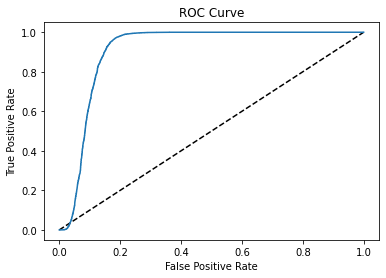

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_curve
logreg.fit(X, y)
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

**Pairs Plot of Selected Variables**

In [ ]:
Team_total =Team_total.drop(["LLoc"], axis=1)

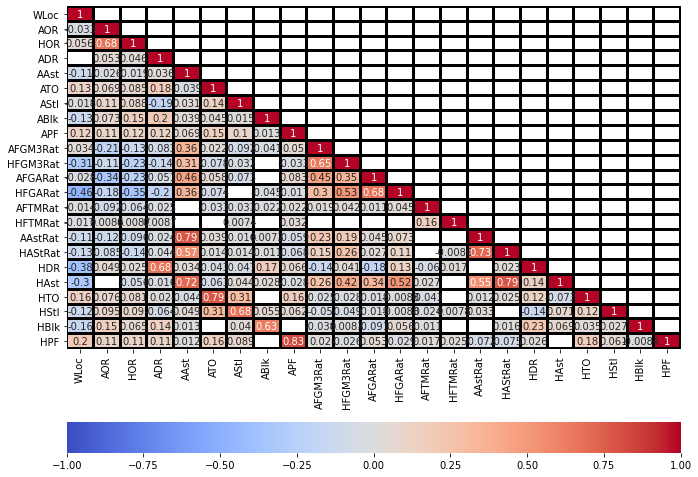

In [ ]:
 def corr_sig(df=None):
    p_matrix = np.zeros(shape=(Team_total.shape[1],
                               Team_total.shape[1]))
    for col in df.columns:
        for col2 in Team_total.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(Team_total[col],
                                   Team_total[col2])
            p_matrix[Team_total.columns.to_list().index(col),
                     Team_total.columns.to_list().index(col2)] = p
    return p_matrix

p_values = corr_sig(Team_total)
mask = np.invert(np.tril(p_values<0.05))

def corr_sig(df=None):
    p_matrix = np.zeros(shape=(Team_total.shape[1],
                               Team_total.shape[1]))
    for col in df.columns:
        for col2 in Team_total.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(Team_total[col],
                                   Team_total[col2])
            p_matrix[Team_total.columns.to_list().index(col),
                     Team_total.columns.to_list().index(col2)] = p
    return p_matrix

p_values = corr_sig(Team_total)
mask = np.invert(np.tril(p_values<0.05))

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})
    
# Plotting with significance filter
corr = Team_total.corr() # get correlation
p_values = corr_sig(Team_total)   # get p-Value
mask = np.invert(np.tril(p_values<0.05))# mask - only get sigificant corrplot_cor_matrix(corr,mask)
plot_cor_matrix(corr,mask)
